# **Introduction and Project Objective**

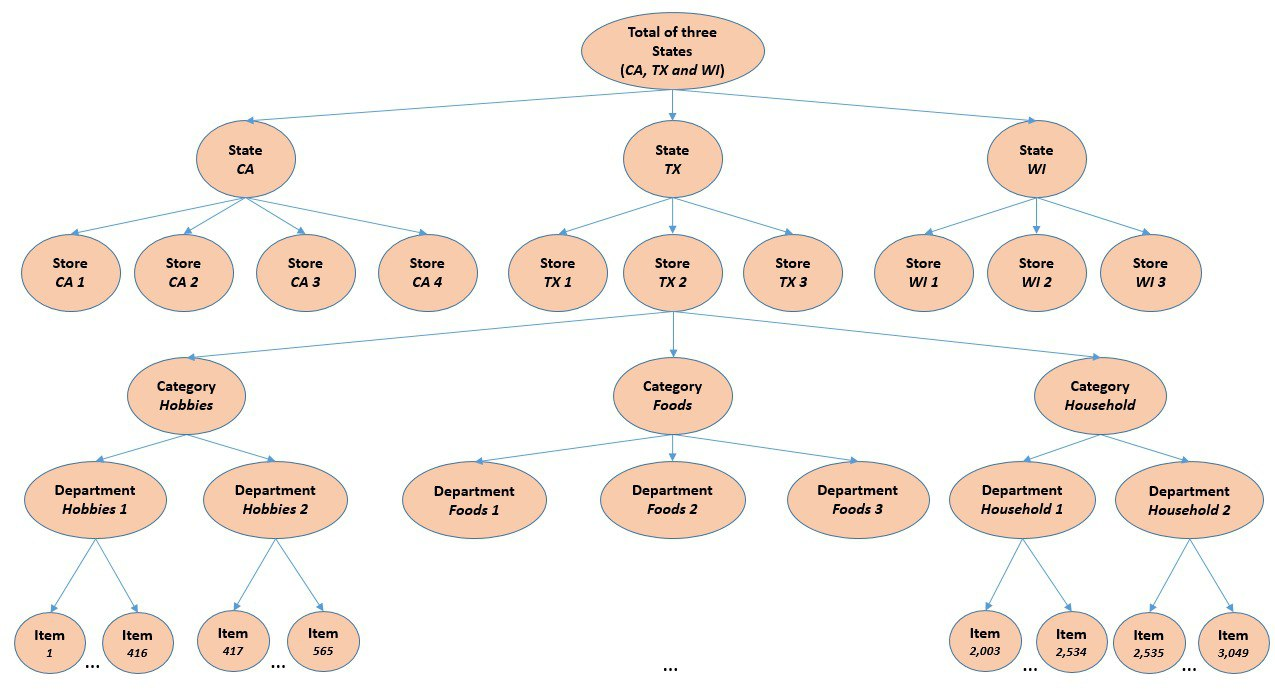

**The objective is to forecast days of sales. Walmart donated sales data recorded from January 29, 2011 to June 19, 2016. The sales data is hierarchical data set. The following graphic shows how the data set is broken down.!**

# Data Files

*calendar.csv >>>>>>>>>>>>>>>>>>> Contains information about the dates on which the products are sold.

*sales_train_validation.csv >>>>>>>>>>>>>>>>>>> Contains the historical daily unit sales data per product and store [d_1 - d_1913]

*sample_submission.csv >>>>>>>>>>>>>>>>>>> The correct format for submissions. Reference the Evaluation tab for more info.

*sell_prices.csv >>>>>>>>>>>>>>>>>>> Contains information about the price of the products sold per store and date.

*sales_train_evaluation.csv >>>>>>>>>>>>>>>>>>> Available one month before competition deadline. Will include sales [d_1 - d_1941]

### **Importing Libraries**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import numpy as np
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [17]:
# --------- Pandas Setup ---------
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option("display.precision", 4)

# --------- Plotting Setup ---------
plt.style.use("seaborn-v0_8-darkgrid")

plt.rcParams.update({
    "figure.figsize": (12, 6),
    "figure.dpi": 120,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "font.size": 11,
})

# --------- Color System ---------
base_palette = sns.color_palette("tab10")
color_pal = base_palette
color_cycle = cycle(base_palette)

# Utility: get next color easily
next_color = lambda: next(color_cycle)


# [Drive Google Drive Link](https://drive.google.com/drive/folders/1yEbRemo_5eIuVM-Ps_ZQHOTPpi6yGUJQ?usp=drive_link)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Define main project path
project_path = "/content/drive/MyDrive/DEPI_Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Datasets**

In [21]:
sales_df    = pd.read_csv(f"{project_path}/Data/raw/sales_train_validation.csv")
calendar_df = pd.read_csv(f"{project_path}/Data/raw/calendar.csv")
prices_df   = pd.read_csv(f"{project_path}/Data/raw/sell_prices.csv")
evaluation_df = pd.read_csv(f"{project_path}/Data/raw/sales_train_evaluation.csv")
submission_df =  pd.read_csv(f"{project_path}/Data/raw/sample_submission.csv")

**sample_submission**

In [29]:
submission_df.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
submission_df.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60979,FOODS_3_827_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [ ]:
submission_df.isnull.sum()

In [32]:
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [33]:
calendar_df.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [34]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
calendar_df.isnull().sum

## **Sales**

In [22]:
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,3,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,5,3,1,0,0,0,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,3,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [23]:
sales_df.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,3,3,7,6,4,6,3,6,2,3,...,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,1,3,3,4,4,3,6,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,1,9,8,1,6,3,3,4,10,4,...,2,1,1,2,1,3,1,1,0,3,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,3,0,3,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,4,1,3,3,3,0,1,4,2,0,5,3,2,0,5,7,3,1,4,3,3,1,2,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [ ]:
sales_df.isnull().sum

###  Visualizing Sales for a Single Item

To gain an initial understanding of the dataset, we start by examining the sales behavior of a high-volume item.  
The item **`FOODS_3_090_CA_3_validation`** is a suitable example, as it consistently records strong sales throughout the training period.

When visualizing its daily sales, we can observe several intervals where the values drop to a flatline.  
These periods likely correspond to days when the item was **unavailable or out of stock**, rather than reflecting an actual drop in customer demand.


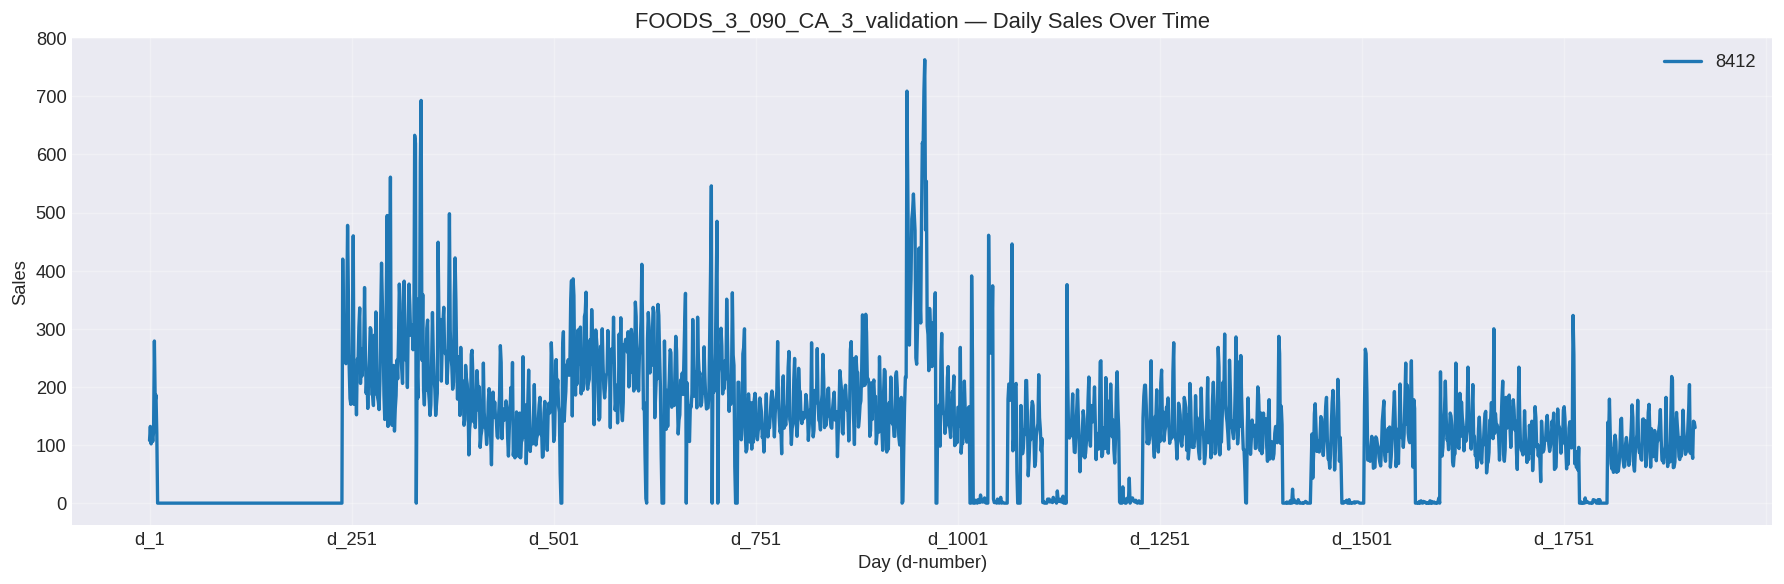

In [28]:
# Identify day-level sales columns
d_cols = [col for col in sales_df.columns if col.startswith("d_")]

# Extract and plot sales for the selected item
item_id = "FOODS_3_090_CA_3_validation"

item_sales = (
    sales_df.loc[sales_df["id"] == item_id, d_cols]
    .T  # transpose so each "d" becomes a row
    .rename(columns={sales_df.loc[sales_df["id"] == item_id, "id"].values[0]: "sales"})
)

item_sales.plot(
    figsize=(15, 5),
    linewidth=2,
    color=next(color_cycle),
    title=f"{item_id} — Daily Sales Over Time",
)

plt.xlabel("Day (d-number)")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


###  Merging Sales Data with Actual Calendar Dates

The dataset includes a calendar table that provides detailed information about both past and future dates.  
By merging this calendar with our day-level sales data, we can map each `d_#` value to its corresponding real-world date.

This alignment enables us to explore time-based patterns more effectively, such as:
- **Weekly seasonality** (weekday vs weekend behavior)
- **Annual or holiday-driven trends**
- **Month-over-month or seasonal variations**

Integrating the calendar greatly enhances our ability to analyze temporal dynamics within the sales data.


In [35]:
# Preview relevant calendar columns
calendar_cols = [
    "d",
    "date",
    "event_name_1",
    "event_name_2",
    "event_type_1",
    "event_type_2",
    "snap_CA"
]

calendar_df[calendar_cols].head()


,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,d_1,2011-01-29,NaN,NaN,NaN,NaN,0
1,d_2,2011-01-30,NaN,NaN,NaN,NaN,0
2,d_3,2011-01-31,NaN,NaN,NaN,NaN,0
3,d_4,2011-02-01,NaN,NaN,NaN,NaN,1
4,d_5,2011-02-02,NaN,NaN,NaN,NaN,1


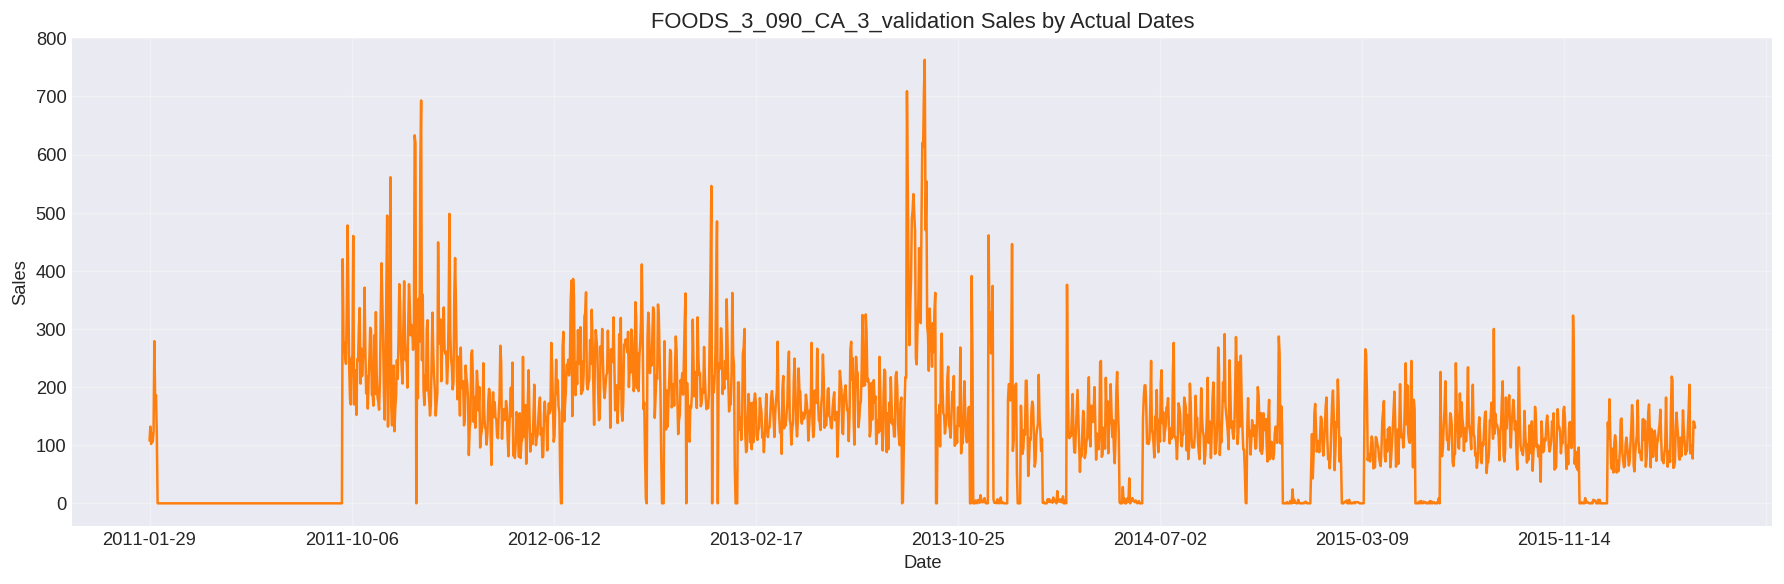

In [41]:
# Function to prepare item sales with calendar
def prepare_item_sales(item_id, sales_df, calendar_df, d_cols):
    """
    Extracts sales for a given item, merges with calendar, and returns a DataFrame.

    Parameters:
        item_id (str): Item identifier
        sales_df (DataFrame): Sales data
        calendar_df (DataFrame): Calendar data
        d_cols (list): List of day columns (d_1, d_2, ...)

    Returns:
        DataFrame: Merged sales + calendar data with 'date' index
    """
    item_sales = (
        sales_df.loc[sales_df["id"] == item_id, d_cols]
        .T
        .rename(columns={sales_df.loc[sales_df["id"] == item_id].index[0]: item_id})
        .reset_index()
        .rename(columns={"index": "d"})
        .merge(calendar_df, how="left", validate="1:1")
        .set_index("date")
    )
    return item_sales

# Example usage
top_items = [
    "FOODS_3_090_CA_3_validation",
    "HOBBIES_1_234_CA_3_validation",
    "HOUSEHOLD_1_118_CA_3_validation"
]

# Store prepared DataFrames
prepared_items = {}

for item in top_items:
    prepared_items[item] = prepare_item_sales(item, sales_df, calendar_df, d_cols)

# Plot the first item as an example
prepared_items["FOODS_3_090_CA_3_validation"]["FOODS_3_090_CA_3_validation"].plot(
    figsize=(15, 5),
    color=next(color_cycle),
    title="FOODS_3_090_CA_3_validation Sales by Actual Dates"
)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


###  Sales Analysis by Time Variables

With our prepared example item, we can now investigate how its sales vary across different time dimensions:

1. **Day of the Week** – Identify weekly patterns and check for weekday vs weekend effects.  
2. **Month** – Examine monthly seasonality and possible trends across the year.  
3. **Year** – Capture annual growth, long-term trends, or recurring yearly patterns.

Analyzing sales along these temporal variables helps uncover seasonality, periodic trends, and potential anomalies.


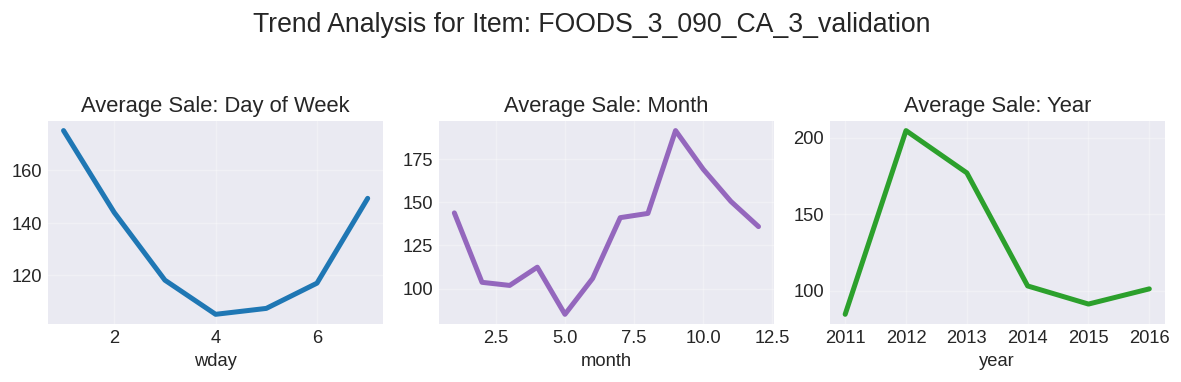

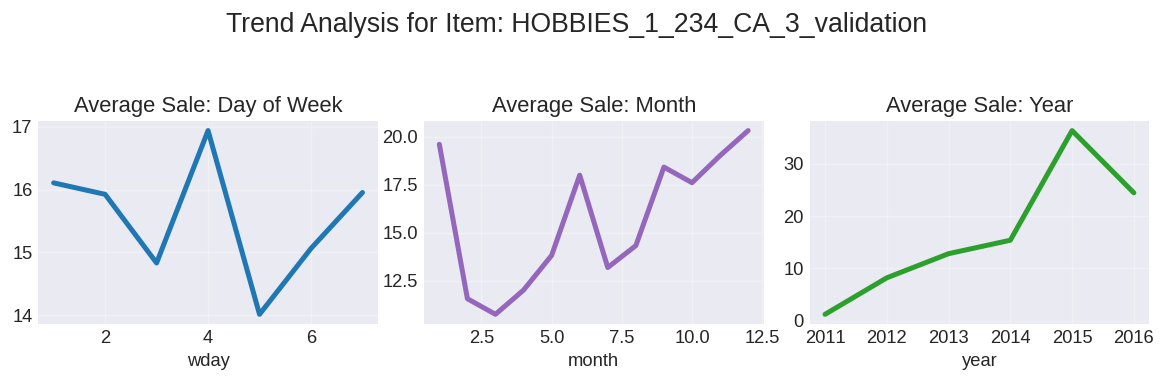

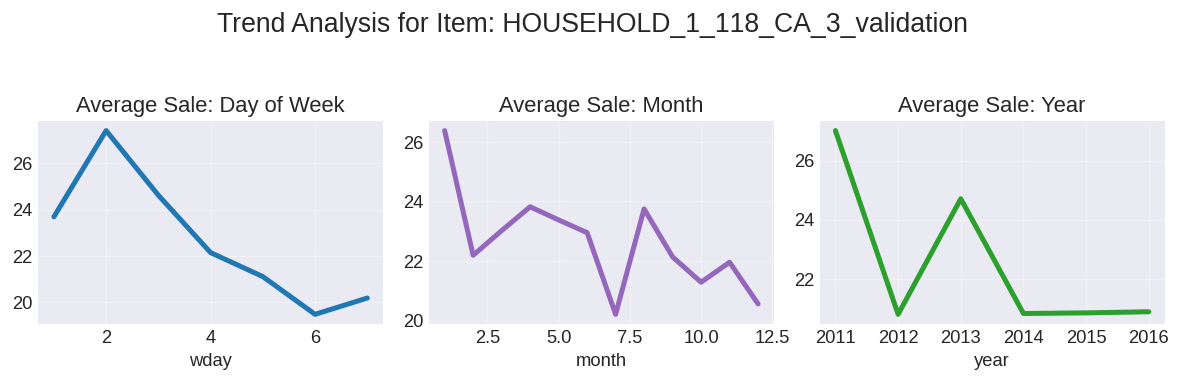

In [51]:
examples = [
    "FOODS_3_090_CA_3_validation",
    "HOBBIES_1_234_CA_3_validation",
    "HOUSEHOLD_1_118_CA_3_validation"
]

for item in examples:
    df = prepared_items[item].copy()

    df[item] = pd.to_numeric(df[item], errors='coerce')

    fig, axes = plt.subplots(1, 3, figsize=(10,3))

    # Day of week
    df.groupby('wday')[item].mean().plot(
        kind='line', lw=3, color=color_pal[0], ax=axes[0], title='Average Sale: Day of Week'
    )

    # Month
    df.groupby('month')[item].mean().plot(
        kind='line', lw=3, color=color_pal[4], ax=axes[1], title='Average Sale: Month'
    )

    # Year
    df.groupby('year')[item].mean().plot(
        kind='line', lw=3, color=color_pal[2], ax=axes[2], title='Average Sale: Year'
    )

    fig.suptitle(f'Trend Analysis for Item: {item}', size=16, y=1.05)
    plt.tight_layout()
    plt.show()


###  Visualizing Multiple Items

To get a broader view of sales patterns, we can examine **20 different items** together. This allows us to identify general trends and anomalies across the dataset.

**Key observations from these plots:**

1. **Temporary unavailability:** Some items show periods of zero sales, indicating stock-outs or items not yet introduced.  
2. **Low-volume items:** Certain items sell very few units (often 1 or less per day), making them challenging to forecast.  
3. **Demand spikes:** Some items experience sudden spikes in sales (e.g., possibly around events like Super Bowl Sunday).  
   - This suggests that **event-related features** in the calendar may provide valuable signals for modeling these spikes.


In [56]:
# Sample 20 random items from the sales dataset
twenty_examples = sales_df.sample(20, random_state=529)

# Keep only sales columns (d_1, d_2, ...) and set 'id' as index
twenty_sales = twenty_examples.set_index('id')[d_cols].T

# Optionally keep the original column names for clarity
twenty_sales.columns = twenty_sales.columns.tolist()

# Merge with actual dates from the calendar
twenty_sales = twenty_sales.merge(
    calendar_df.set_index('d')['date'],  # calendar date column
    left_index=True,
    right_index=True,
    validate='1:1'               # ensure one-to-one merge
).set_index('date')

# Inspect the resulting DataFrame
twenty_sales.head()


,FOODS_1_013_TX_1_validation,HOUSEHOLD_1_311_WI_1_validation,FOODS_3_805_CA_3_validation,HOUSEHOLD_2_369_TX_2_validation,HOUSEHOLD_1_080_TX_2_validation,HOUSEHOLD_1_463_CA_2_validation,FOODS_2_046_CA_1_validation,HOUSEHOLD_2_102_WI_3_validation,FOODS_2_131_TX_2_validation,HOUSEHOLD_2_115_WI_1_validation,HOUSEHOLD_1_192_CA_3_validation,FOODS_3_641_CA_1_validation,FOODS_2_110_WI_2_validation,HOUSEHOLD_2_060_TX_2_validation,FOODS_3_018_CA_3_validation,FOODS_1_137_WI_2_validation,FOODS_3_667_CA_2_validation,FOODS_2_162_WI_1_validation,HOBBIES_2_142_TX_2_validation,FOODS_1_053_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,1,0
2011-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
2011-01-31,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,6,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,5,0
2011-02-02,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,6,0


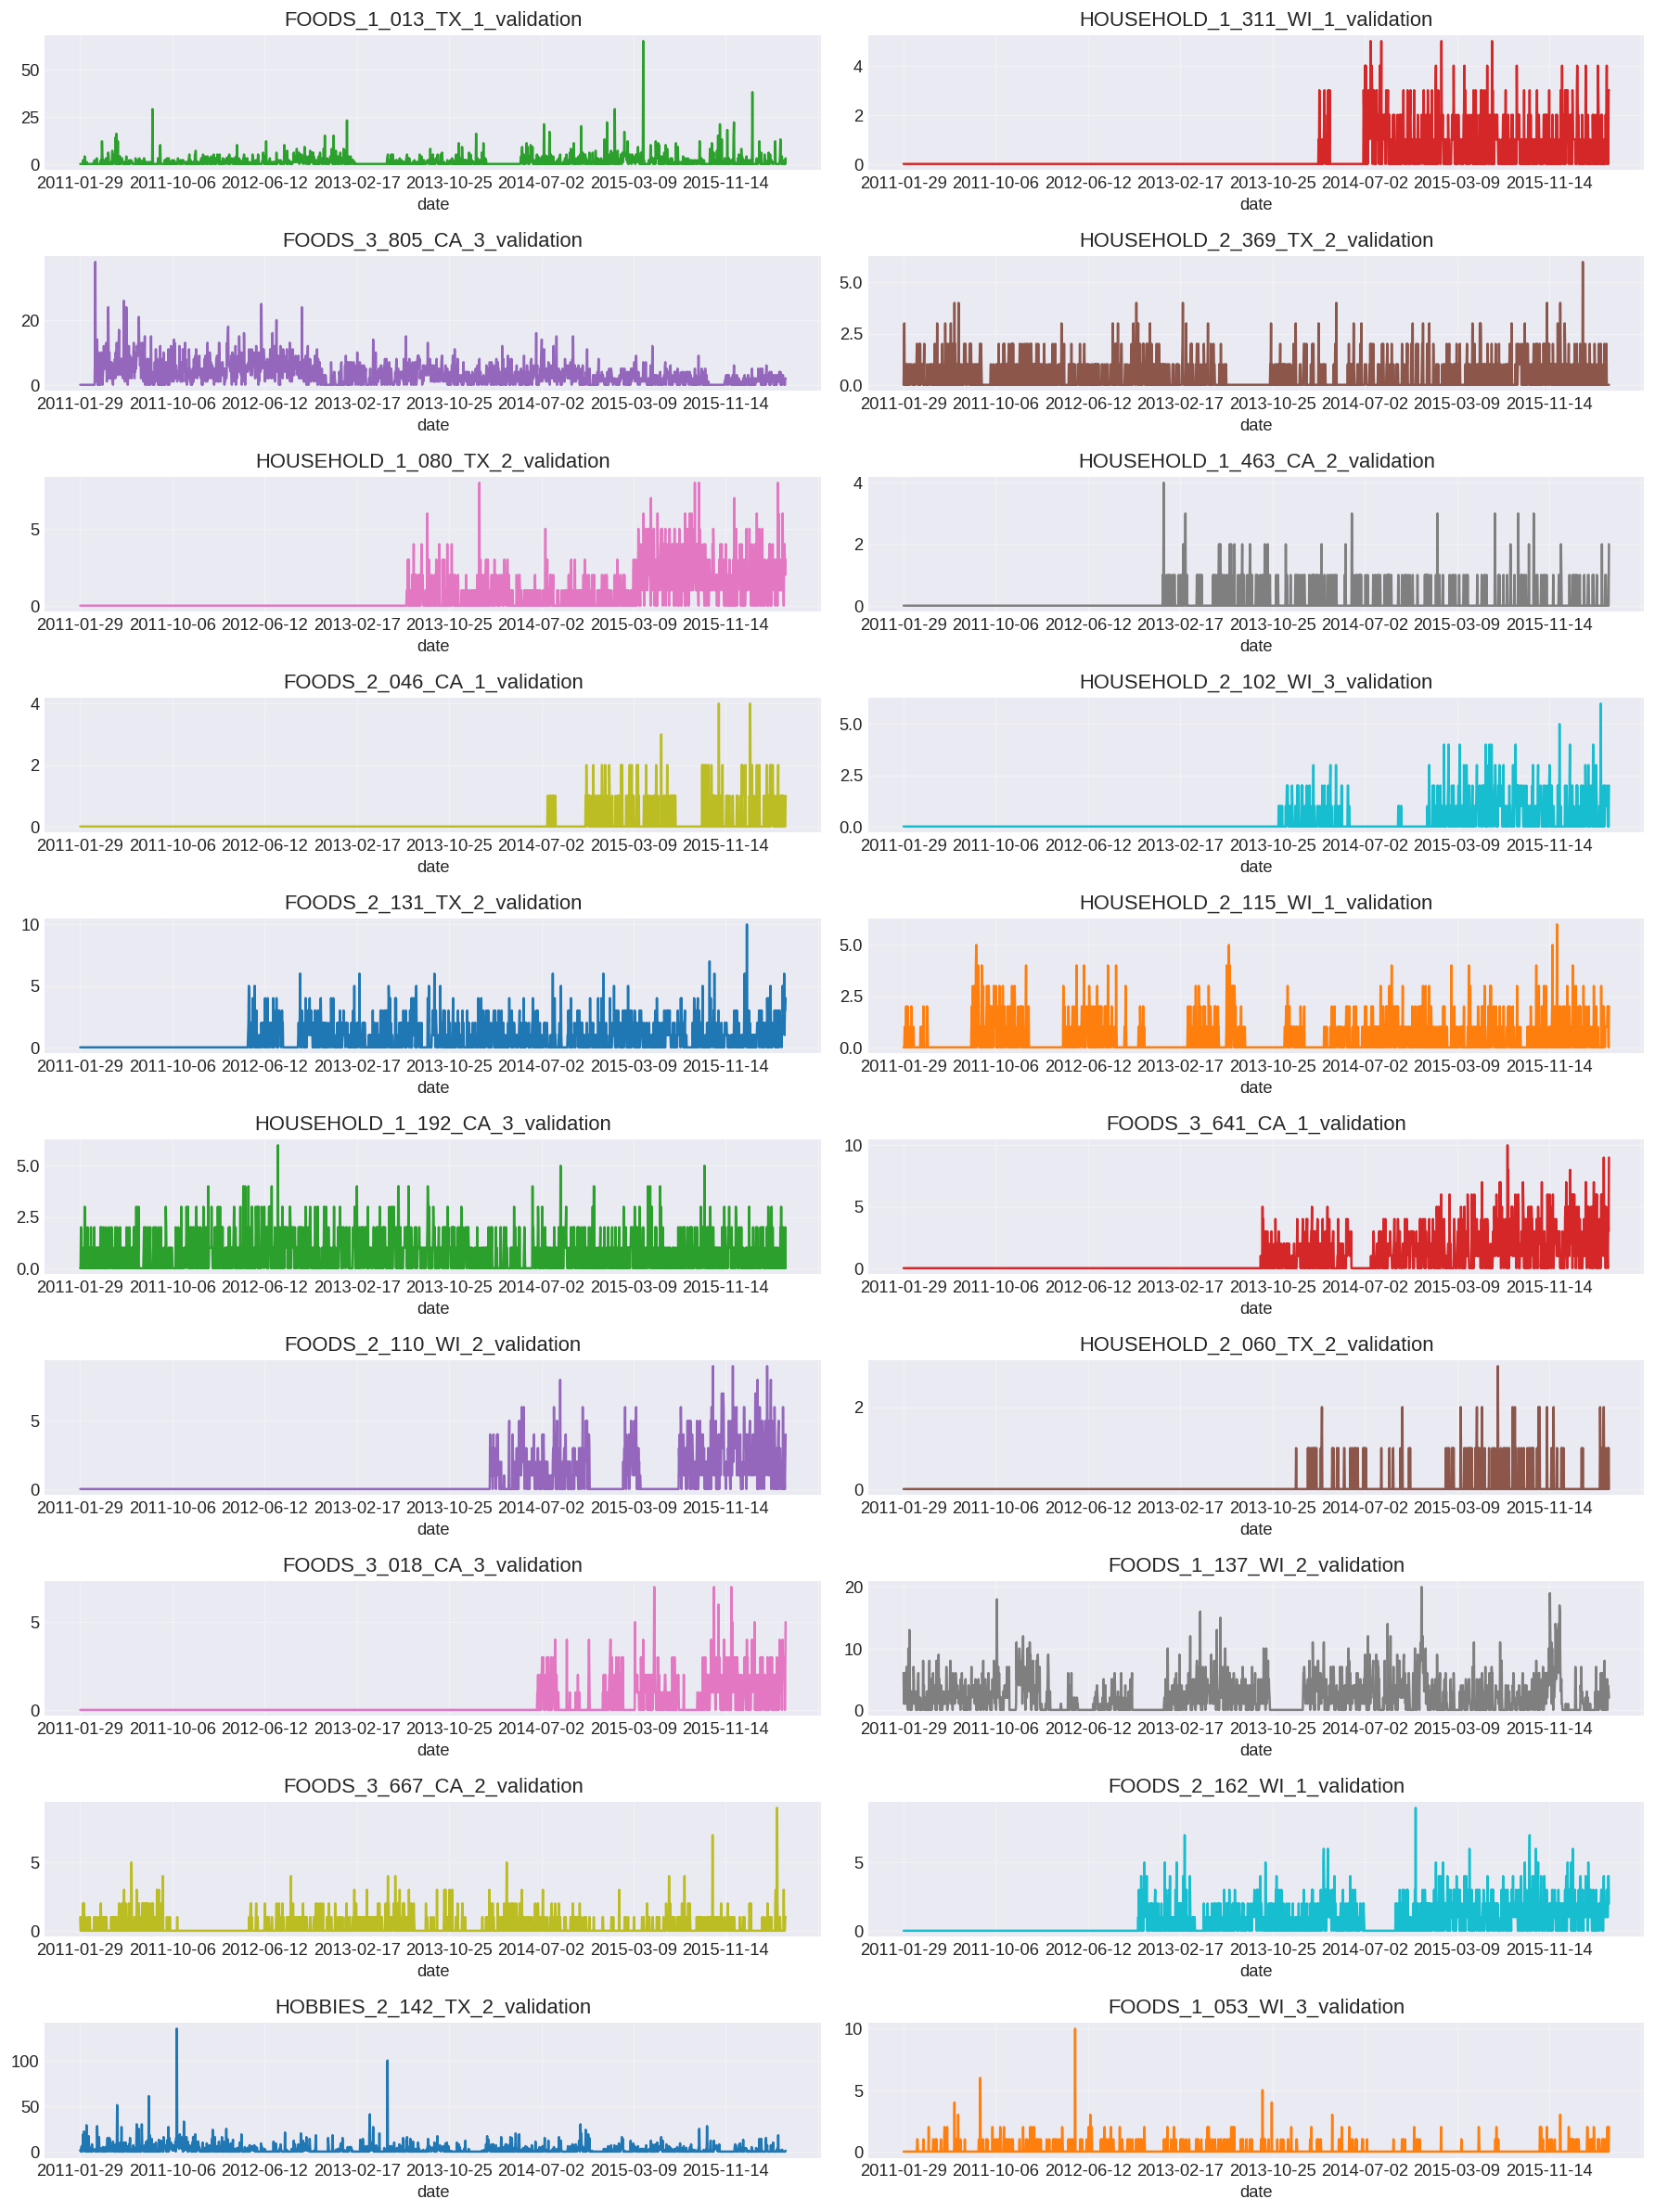

In [58]:
# Create subplots for 20 items (10 rows x 2 columns)
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Initialize axis index
ax_idx = 0

# Loop through each item and plot its sales
for item in twenty_sales.columns:
    twenty_sales[item].plot(
        title=item,              # Set the title as the item ID
        color=next(color_cycle), # Use a cycling color
        ax=axs[ax_idx]           # Plot on the current subplot
    )
    ax_idx += 1

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display all plots
plt.show()


## Combined Sales Over Time by Item Type

We have several item categories:

- **Hobbies**
- **Household**
- **Foods**

Let's visualize the total demand over time for each category.

The steps involved are:

1. Group items by their category (`cat_id`).
2. Sum sales across all items within each category for every day.
3. Plot the aggregated sales to compare trends across categories.

This visualization helps us identify:

- Overall demand patterns for each category.
- Seasonal effects or spikes in sales.
- Differences in total sales volume between categories.


In [59]:
sales_df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

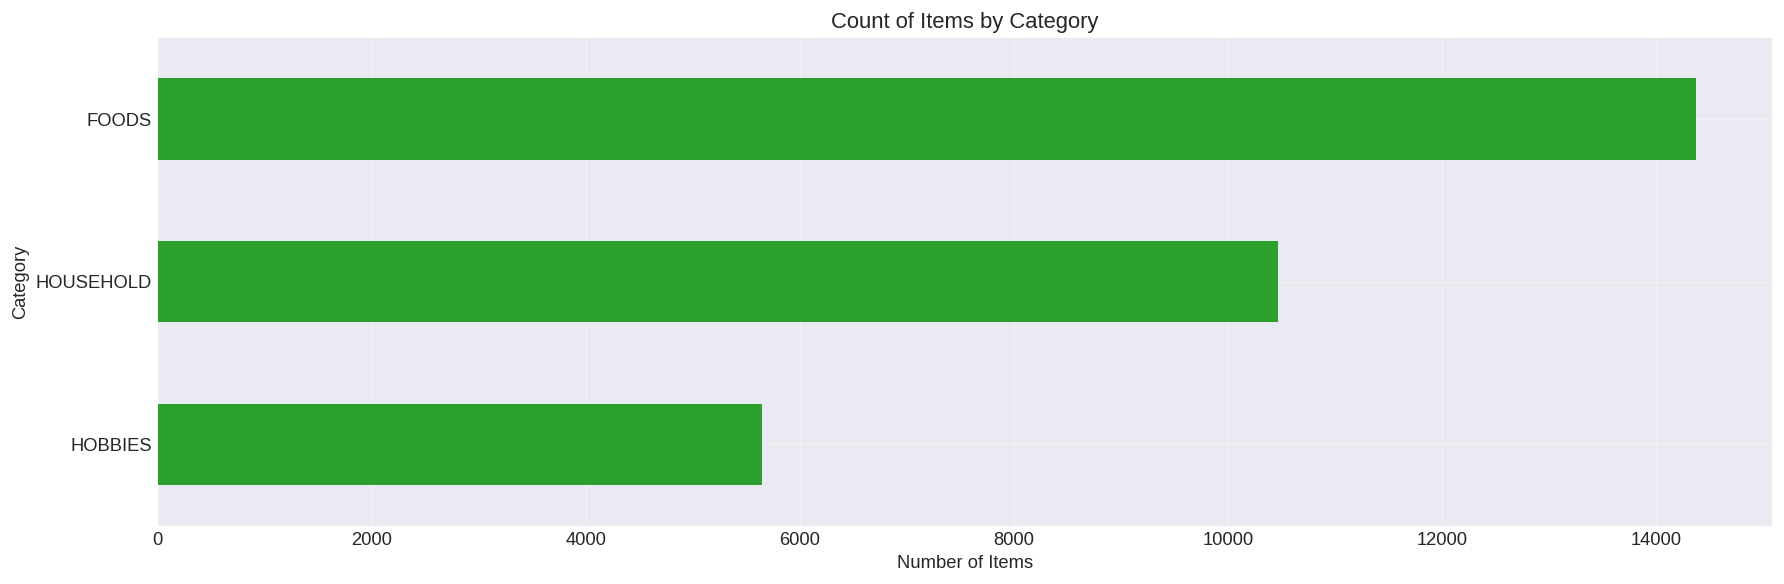

In [60]:
# Count the number of items per category
item_counts = sales_df.groupby('cat_id')['id'].count().sort_values()

# Plot a horizontal bar chart
item_counts.plot(
    kind='barh',          # Horizontal bar chart
    figsize=(15, 5),      # Figure size
    title='Count of Items by Category',  # Plot title
    color=next(color_cycle)              # Use color from the cycle
)

# Show the plot
plt.xlabel('Number of Items')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

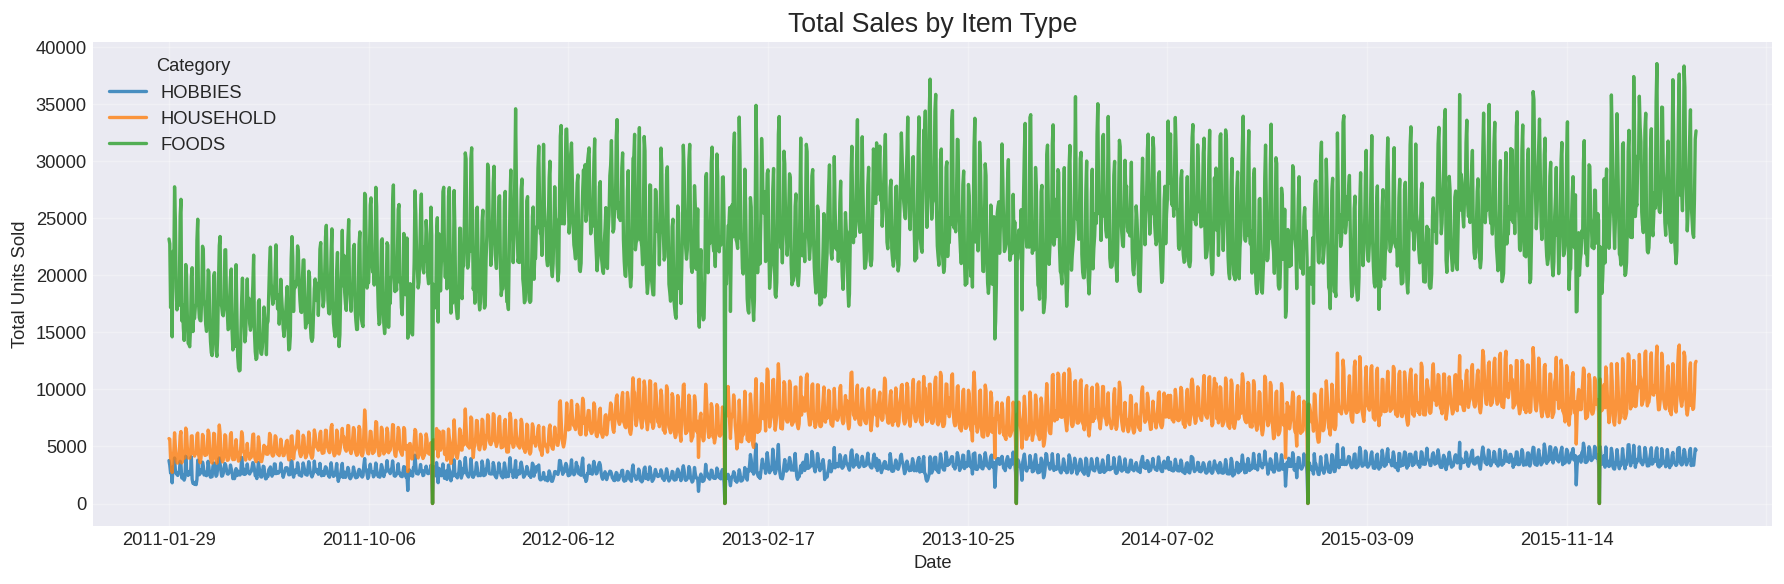

In [64]:
# Prepare sales data with actual dates as index
past_sales = (
    sales_df.set_index('id')[d_cols]    # Select sales columns only
    .T                             # Transpose so days become rows
    .merge(
        calendar_df.set_index('d')['date'], # Merge with calendar to get real dates
        left_index=True,
        right_index=True,
        validate='1:1'              # Ensure one-to-one merge
    )
    .set_index('date')             # Set the index to actual dates
)

# Plot total sales over time for each item category
plt.figure(figsize=(15,5))

for cat in sales_df['cat_id'].unique():
    # Select columns corresponding to the current category
    items_col = [c for c in past_sales.columns if cat in c]

    # Sum sales across all items in the category for each day and plot
    past_sales[items_col].sum(axis=1).plot(
        alpha=0.8,              # Make lines slightly transparent
        lw=2,                   # Line width
        label=cat               # Label for the legend
    )

# Add title and legend
plt.title('Total Sales by Item Type', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Rollout of Items Being Sold

Some items are gradually introduced into the inventory over time, while others may stop being sold entirely.  

To visualize this:

- We'll consider whether an item is selling or not:
  - `0` → Not selling
  - `>0` → Selling
- This allows us to see the **availability trend** of items rather than actual sales volume.

Observations from this plot:

- Many items are introduced slowly, so they may not have any sales recorded at the start of the dataset.
- Some items are discontinued at later dates.
- This kind of plot helps us understand **inventory rollout patterns**, which is important for forecasting and modeling demand.


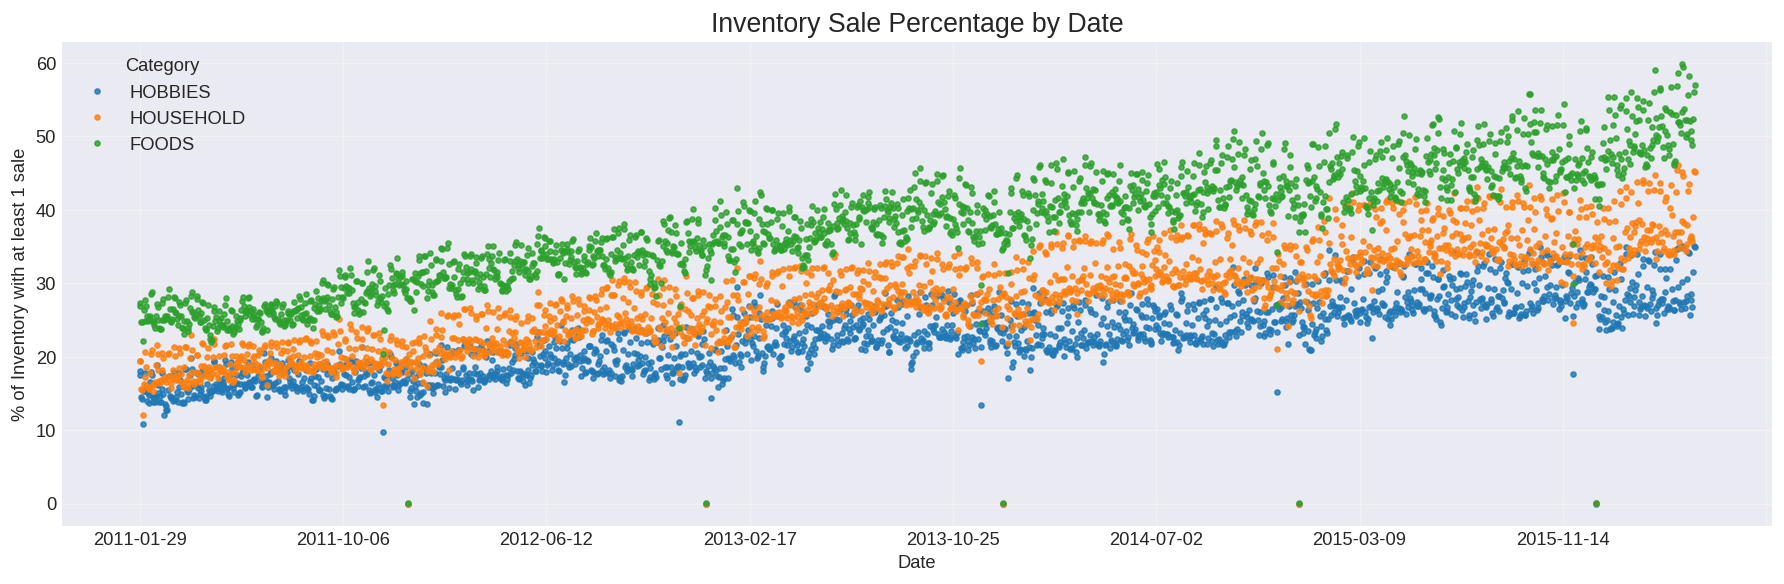

In [65]:
# Clip sales to 0 or 1 to indicate selling status only
past_sales_clipped = past_sales.clip(0, 1)

# Plot the percentage of items being sold over time for each category
plt.figure(figsize=(15, 5))

for cat in sales_df['cat_id'].unique():
    # Select columns corresponding to the current category
    items_col = [c for c in past_sales.columns if cat in c]

    # Compute percentage of items selling at least once and plot
    (past_sales_clipped[items_col].mean(axis=1) * 100).plot(
        alpha=0.8,        # Slight transparency
        style='.',         # Dot plot
        label=cat          # Legend label
    )

# Add title and labels
plt.title('Inventory Sale Percentage by Date', fontsize=16)
plt.ylabel('% of Inventory with at least 1 sale')
plt.xlabel('Date')

# Add legend
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Sales by Store

The dataset includes sales data for 10 unique stores.  

**Objective:**  
We want to analyze the total sales per store over time to identify patterns and differences in performance.

**Key observations:**

- Some stores show **steady sales** across the entire period.  
- Certain stores, like **CA_2**, display a **significant change around 2015**, which may indicate an expansion, closure, or some external factor affecting demand.

By plotting total sales by store, we can better understand **store-level demand trends**, which is crucial for forecasting and inventory planning.


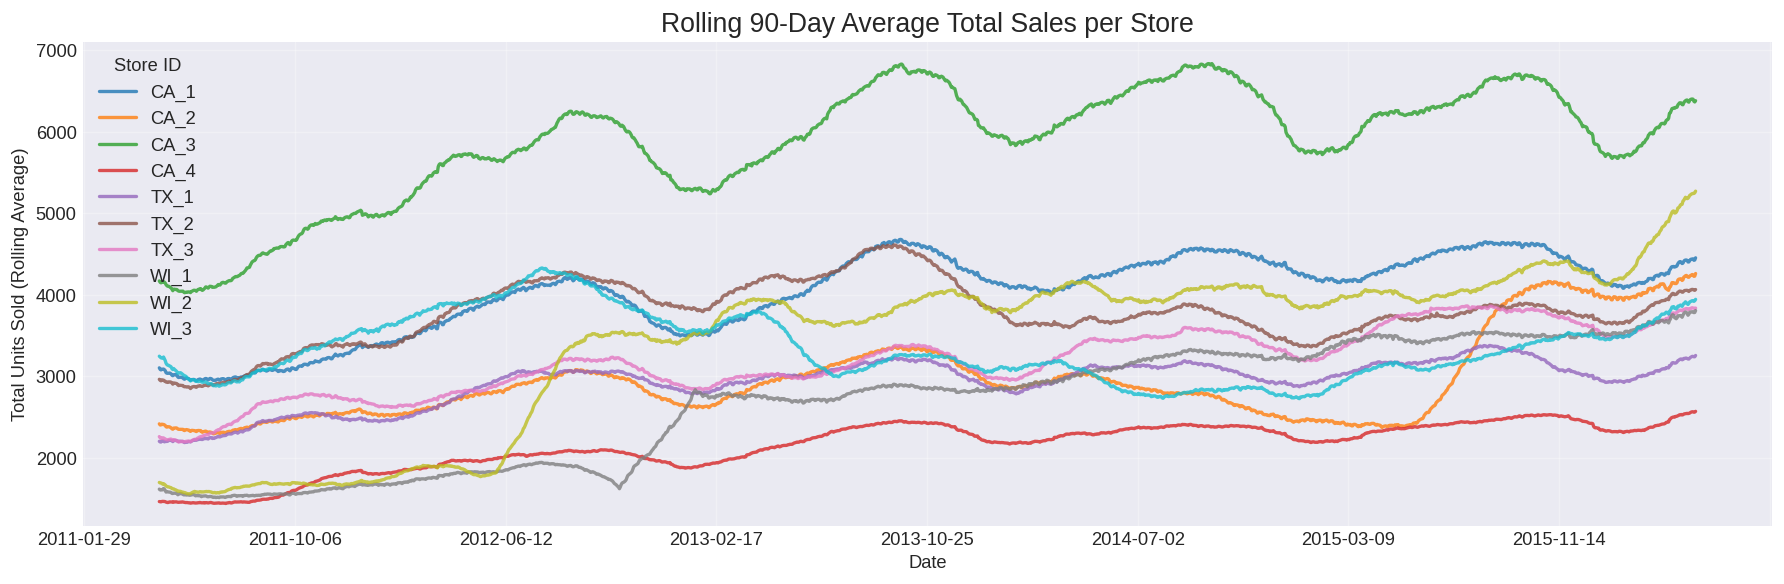

In [67]:
# Get unique store IDs
store_list = prices_df['store_id'].unique()

# Plot rolling 90-day average total sales per store
plt.figure(figsize=(15, 5))

for store in store_list:
    # Select all items sold in the current store
    store_items = [c for c in past_sales.columns if store in c]

    # Compute total sales across all items and apply 90-day rolling average
    past_sales[store_items].sum(axis=1).rolling(90).mean().plot(
        alpha=0.8,       # Slight transparency for better readability
        lw=2,            # Line width
        label=store      # Legend label
    )

# Add plot title and labels
plt.title('Rolling 90-Day Average Total Sales per Store', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Units Sold (Rolling Average)')

# Add legend
plt.legend(title='Store ID')
plt.tight_layout()
plt.show()

## Rolling 7-Day Total Demand by Store

We can also analyze the data by computing a **7-day rolling total demand** for each store.  

**Purpose:**  
- Highlight short-term trends and fluctuations in demand.  
- Identify abrupt changes in store-level demand which may indicate:
  - Store expansion  
  - New competitors nearby  
  - Seasonal events or promotions  

**Observation:**  
Some stores show sudden jumps or drops in demand. Recognizing these patterns is crucial for **building accurate predictive models** and understanding real-world sales dynamics.


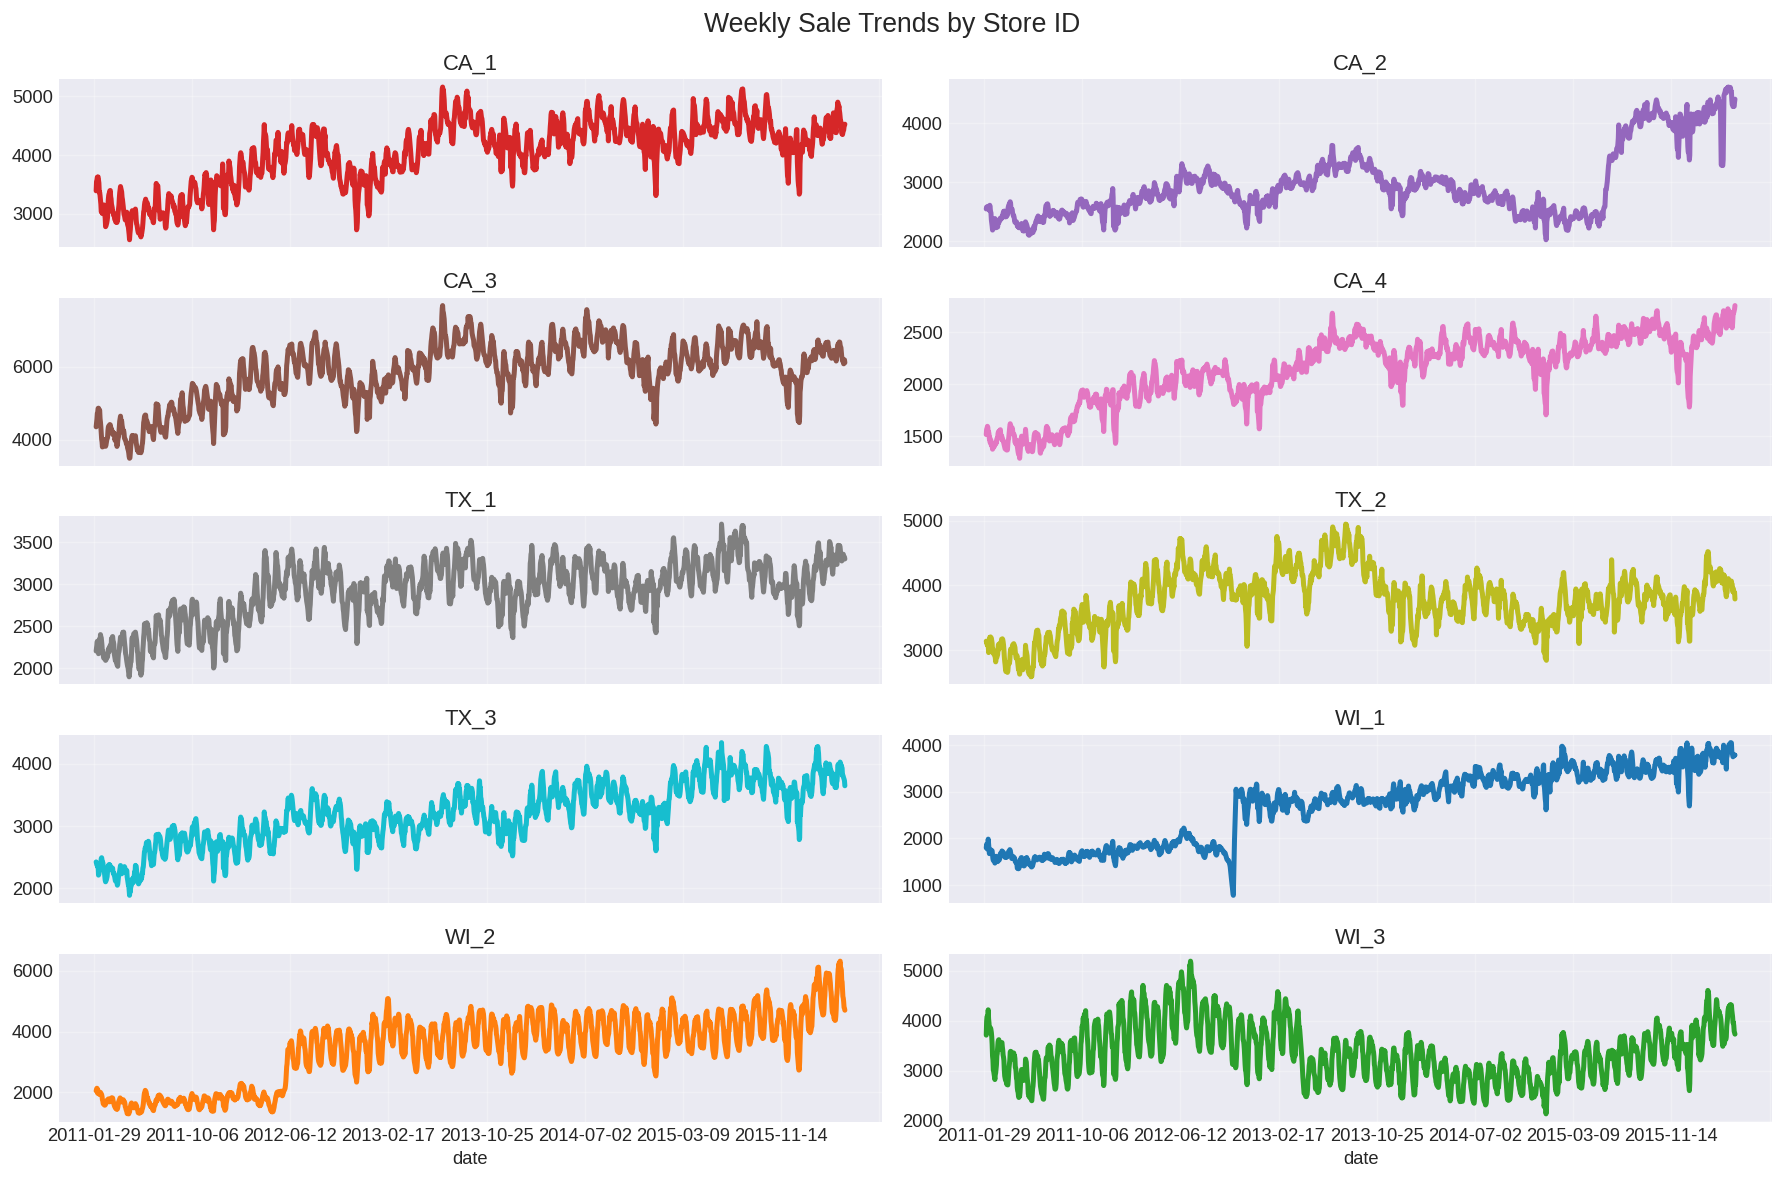

In [68]:
# Plot weekly (7-day rolling) total sales per store
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

# Loop through all stores
for idx, store in enumerate(store_list):
    # Select all items sold in the current store
    store_items = [c for c in past_sales.columns if store in c]

    # Compute 7-day rolling total sales and plot
    past_sales[store_items].sum(axis=1).rolling(7).mean().plot(
        ax=axes[idx],
        alpha=1,                 # Full opacity
        lw=3,                    # Line width
        title=store,
        color=next(color_cycle)  # Cycle through colors
    )

# Overall figure title
plt.suptitle('Weekly Sale Trends by Store ID', fontsize=16)
plt.tight_layout()
plt.show()


## **Sales Heatmap Calendar**


In [71]:
def calmap(ax, year, data):
    """
    Draw a calendar heatmap for a given year on the provided axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to draw the heatmap on.
        year (int): Year to visualize.
        data (np.array): 2D array of shape (7, 53) containing daily data.
                         Rows represent weekdays (Mon=0, ..., Sun=6),
                         columns represent weeks.
    """
    # Axis styling
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Prepare month borders and labels
    xticks, labels = [], []
    start = datetime(year, 1, 1).weekday()  # Weekday of Jan 1
    for month in range(1, 13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        # Weekday positions
        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j")) + start - 1) // 7
        x1 = (int(last.strftime("%j")) + start - 1) // 7

        # Polygon for month border
        P = [
            (x0,   y0), (x0,    7),  (x1,   7),
            (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
            (x0+1,  0), (x0+1,  y0)
        ]
        xticks.append(x0 + (x1 - x0 + 1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)

    # Set axis labels and title
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title(f"{year}", weight="semibold")

    # Mask first and last day data to avoid showing invalid days
    valid_start = datetime(year, 1, 1).weekday()
    data[:valid_start, 0] = np.nan
    valid_end = datetime(year, 12, 31).weekday()
    data[valid_end+1:, x1] = np.nan

    # Plot the heatmap
    ax.imshow(
        data,
        extent=[0, 53, 0, 7],
        zorder=10,
        vmin=-1,
        vmax=1,
        cmap="RdYlBu_r",
        origin="lower",
        alpha=0.75
    )


It seems that Walmart stores are closed on **Christmas Day**, resulting in very low sales on that date.  

Interestingly, the **highest demand day** recorded in the dataset was **Sunday, March 6th, 2016**.  
You might wonder what happened on that day… well, it coincided with the **Seventh Democratic presidential candidates debate**, hosted by CNN in Flint, Michigan.  

Though amusing, it’s highly unlikely that a political debate had any real impact on Walmart sales!

In [74]:
# Calculate total sales per day
total_daily_sales = past_sales.sum(axis=1)

# Find day with lowest sales
min_day = total_daily_sales.idxmin()
min_sales = total_daily_sales.min()
print(f'The lowest sale date was: {min_day} with {min_sales} sales')

# Find day with highest sales
max_day = total_daily_sales.idxmax()
max_sales = total_daily_sales.max()
print(f'The highest sale date was: {max_day} with {max_sales} sales')


The lowest sale date was: 2012-12-25 with 11 sales
The highest sale date was: 2016-03-06 with 57218 sales


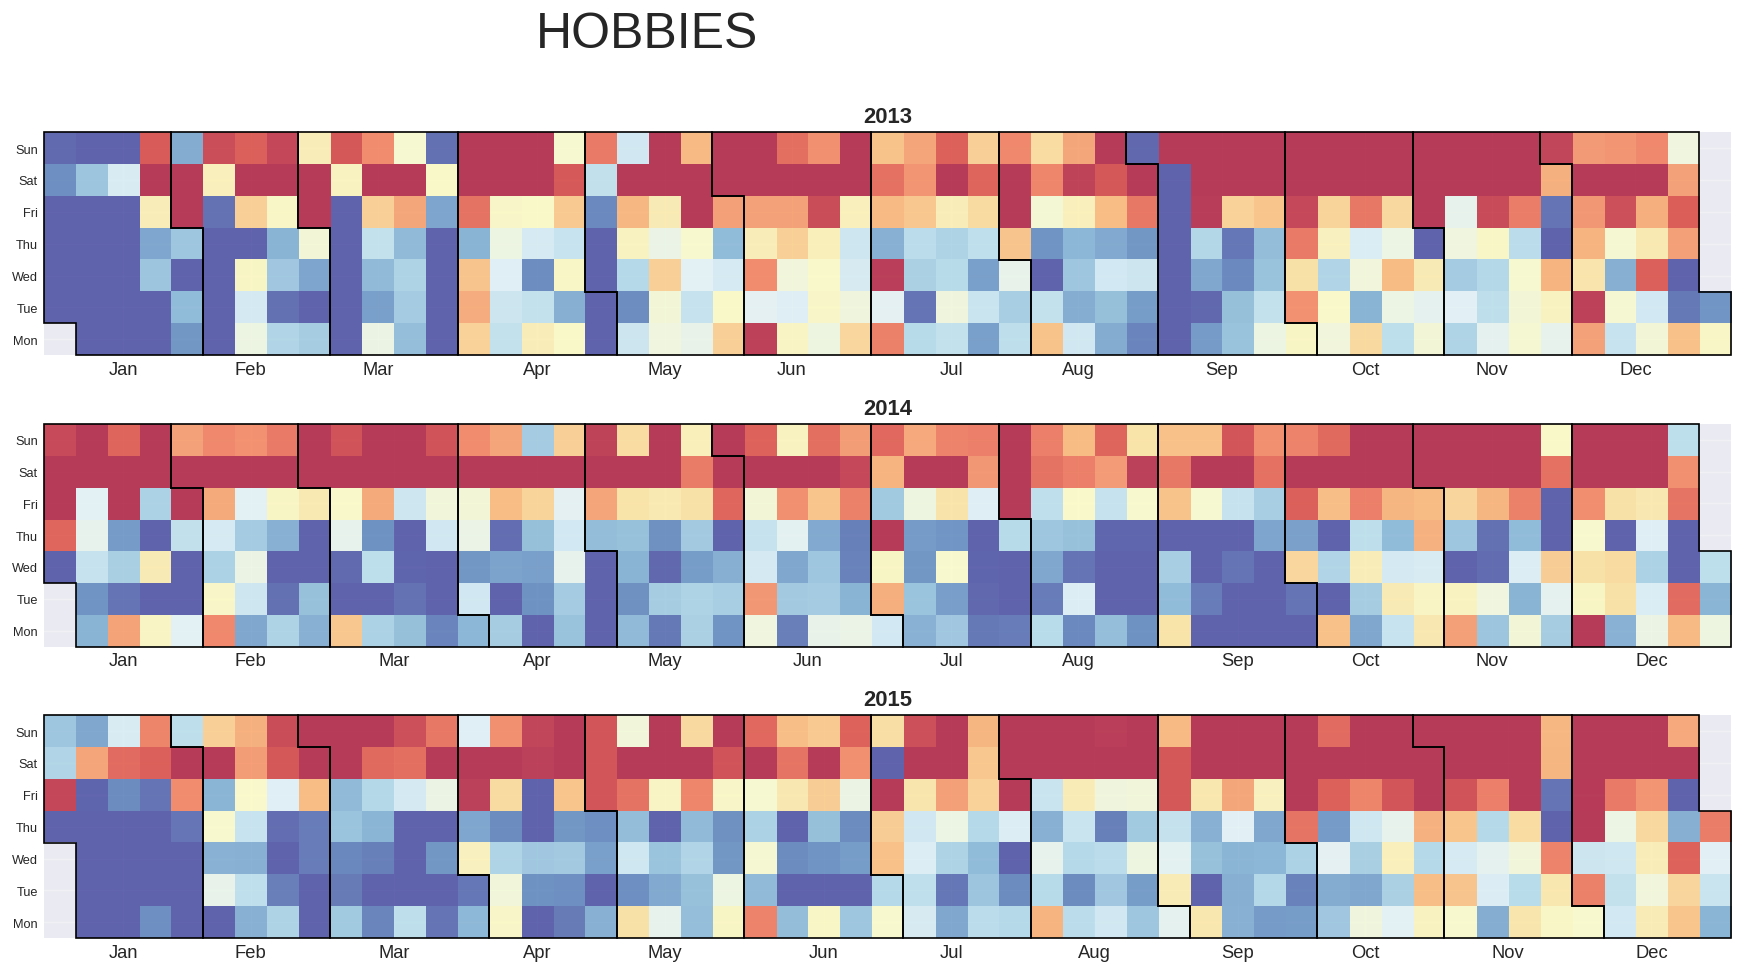

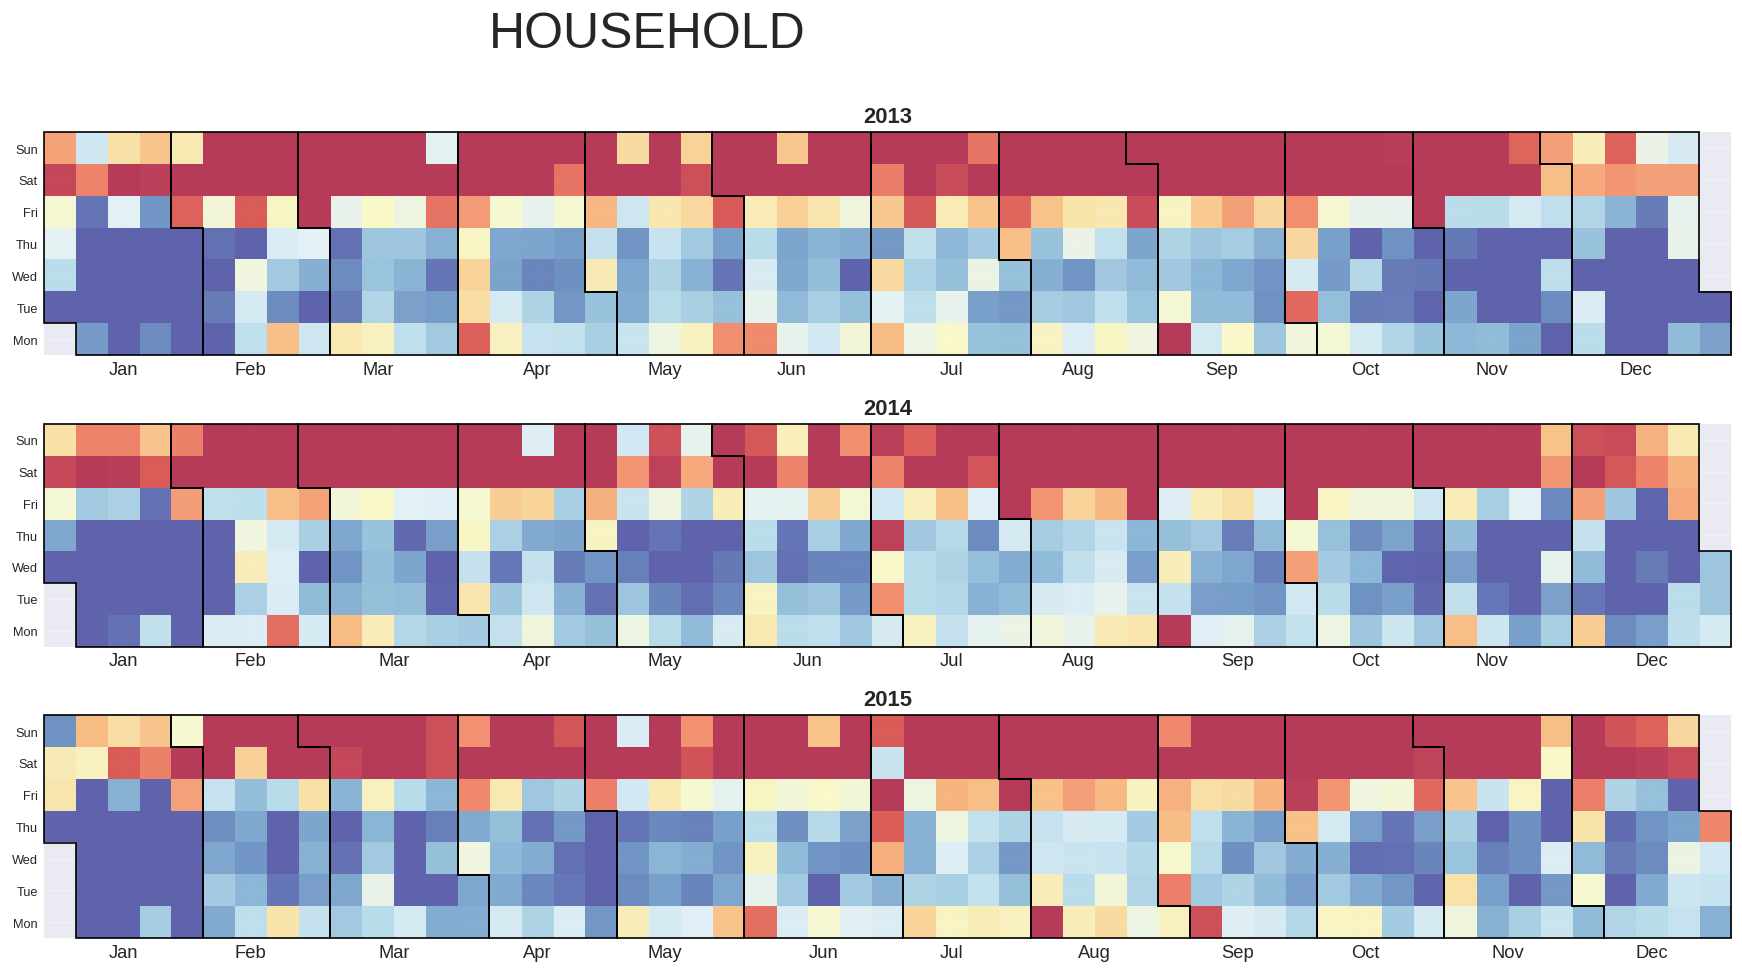

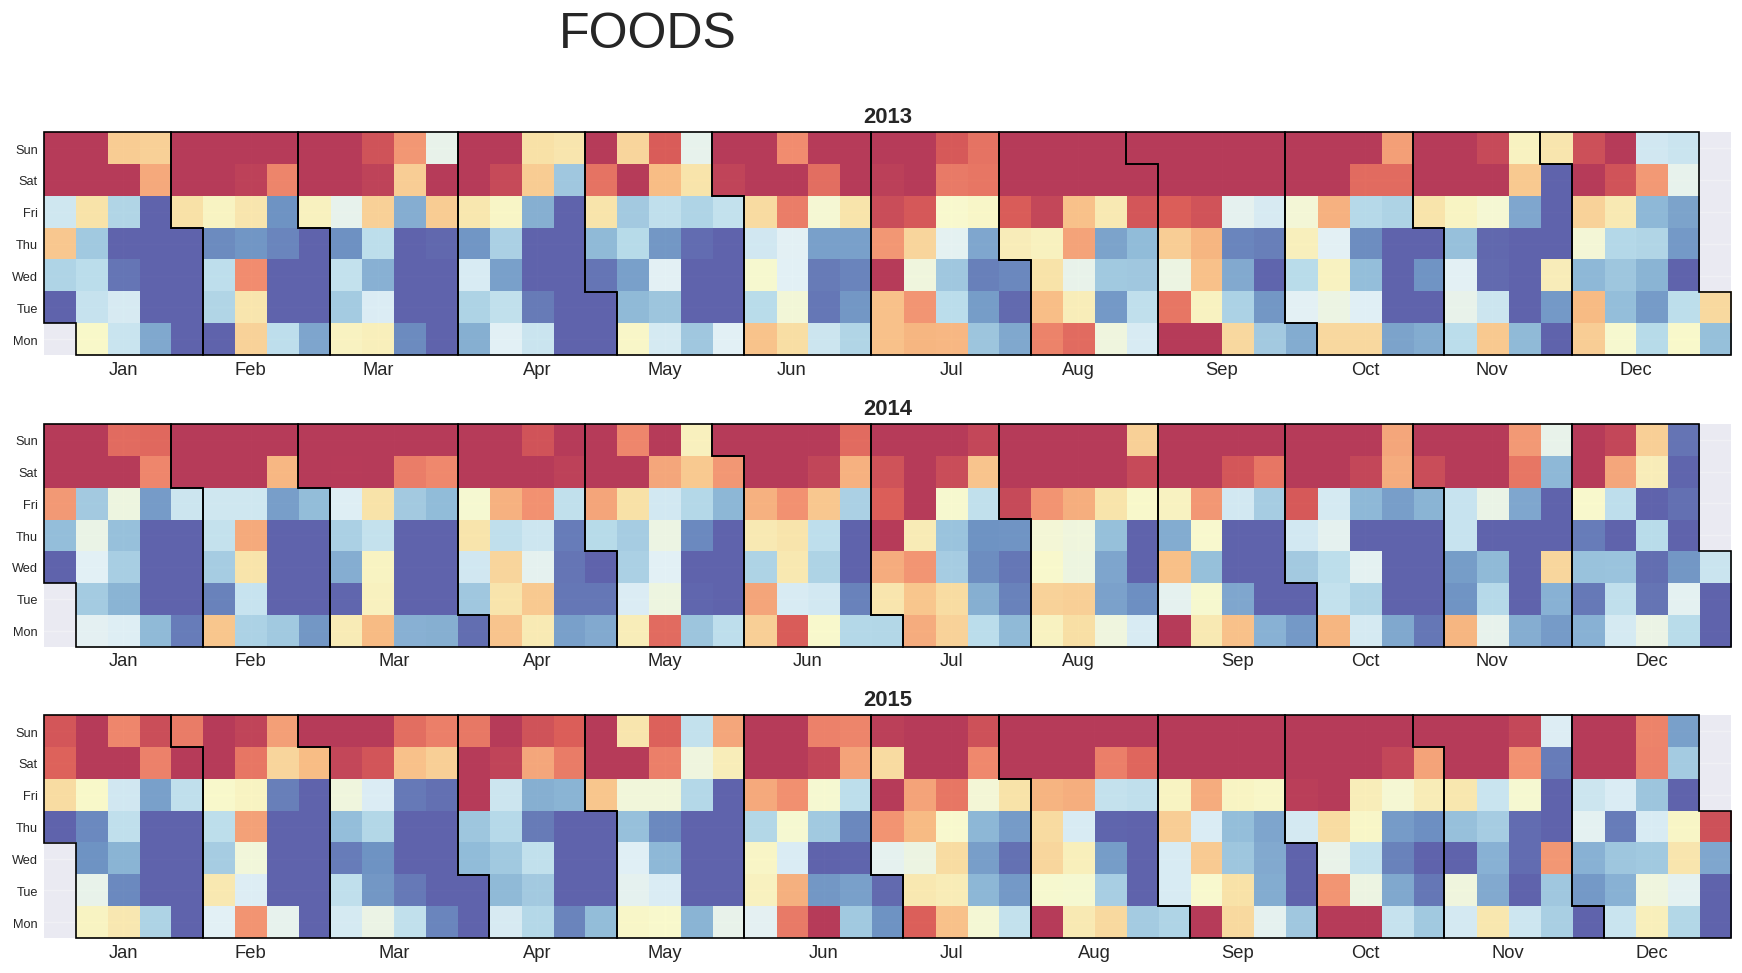

In [76]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
sscale = StandardScaler()

# Ensure the index is datetime
past_sales.index = pd.to_datetime(past_sales.index)

# Loop over each category
for cat in sales_df['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))

    # Select all items for this category
    items_col = [c for c in past_sales.columns if cat in c]

    # Loop over the years 2013-2015
    for idx, year_start in enumerate(['31-Dec-2012', '30-Dec-2013', '29-Dec-2014']):
        # Extract sales for the year
        sales_year = past_sales.loc[
            past_sales.index.isin(pd.date_range(year_start, periods=371)), items_col
        ].mean(axis=1)

        # Standardize the values
        vals = np.hstack(sscale.fit_transform(sales_year.values.reshape(-1, 1)))

        # Plot the heatmap calendar
        calmap(axes[idx], 2013 + idx, vals.reshape(53, 7).T)

    # Set the overall title for the category
    plt.suptitle(cat, fontsize=30, x=0.4, y=1.01)
    plt.tight_layout()
    plt.show()


Some interesting things to note from these heatmaps:

Food tends to have lower number of purchases as the month goes on. Could this be because people get their paychecks early in the month?
Household and Hobby items sell much less in January - after the Holiday season is over.
Cleary weekends are more popular shopping days regardless of the item category.


### Sale Prices

We are provided with historical sale prices for each item. Let's examine the trends for our example item:

- The price of the selected item appears to be increasing over time.
- Different stores may sell the same item at different prices, reflecting store-specific pricing strategies.


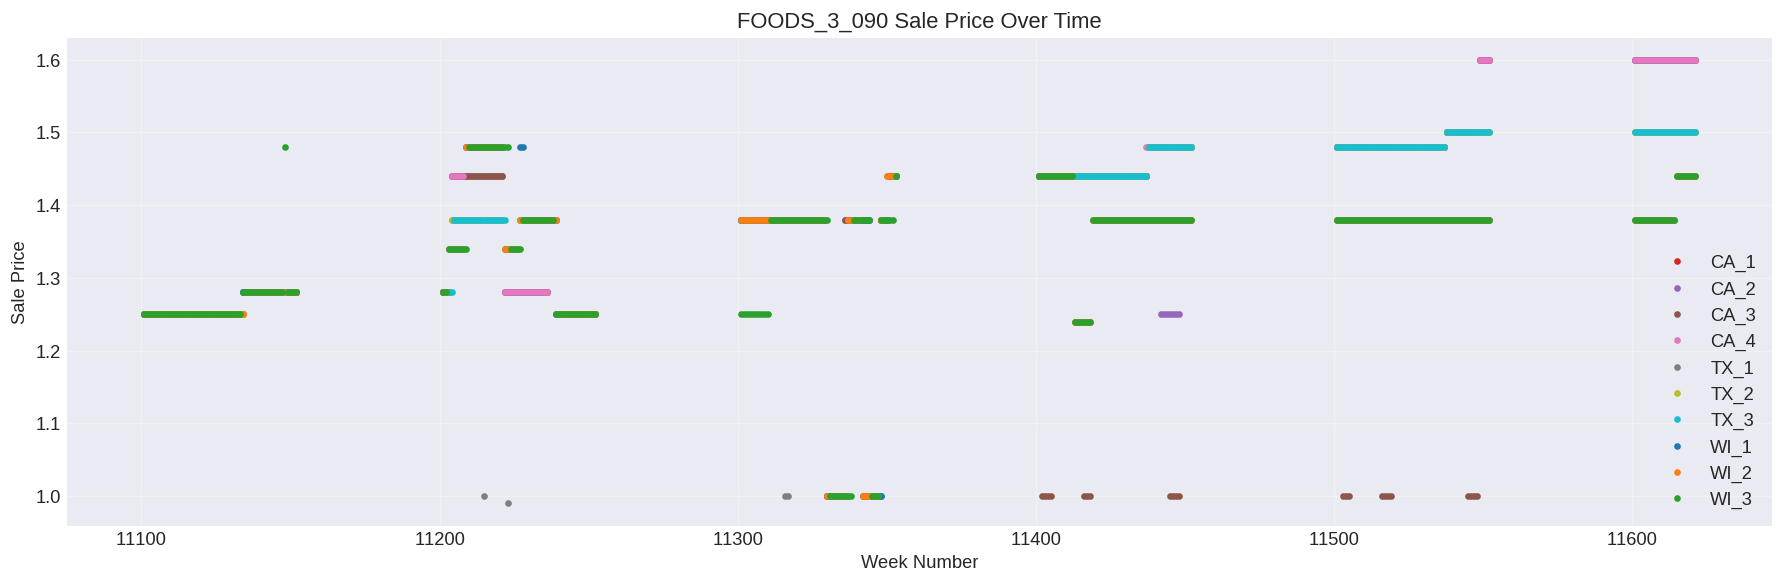

In [78]:
# Plot sale prices for the example item across different stores
fig, ax = plt.subplots(figsize=(15, 5))

# Keep track of store labels for the legend
stores = []

# Group the price data by store for the specific item
for store, d in prices_df.query('item_id == "FOODS_3_090"').groupby('store_id'):
    d.plot(
        x='wm_yr_wk',          # Weekly time index
        y='sell_price',         # Sale price
        style='.',              # Dot markers
        color=next(color_cycle),
        ax=ax,
        title='FOODS_3_090 Sale Price Over Time'
    )
    stores.append(store)

# Add legend with store labels
plt.legend(stores)
plt.xlabel("Week Number")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

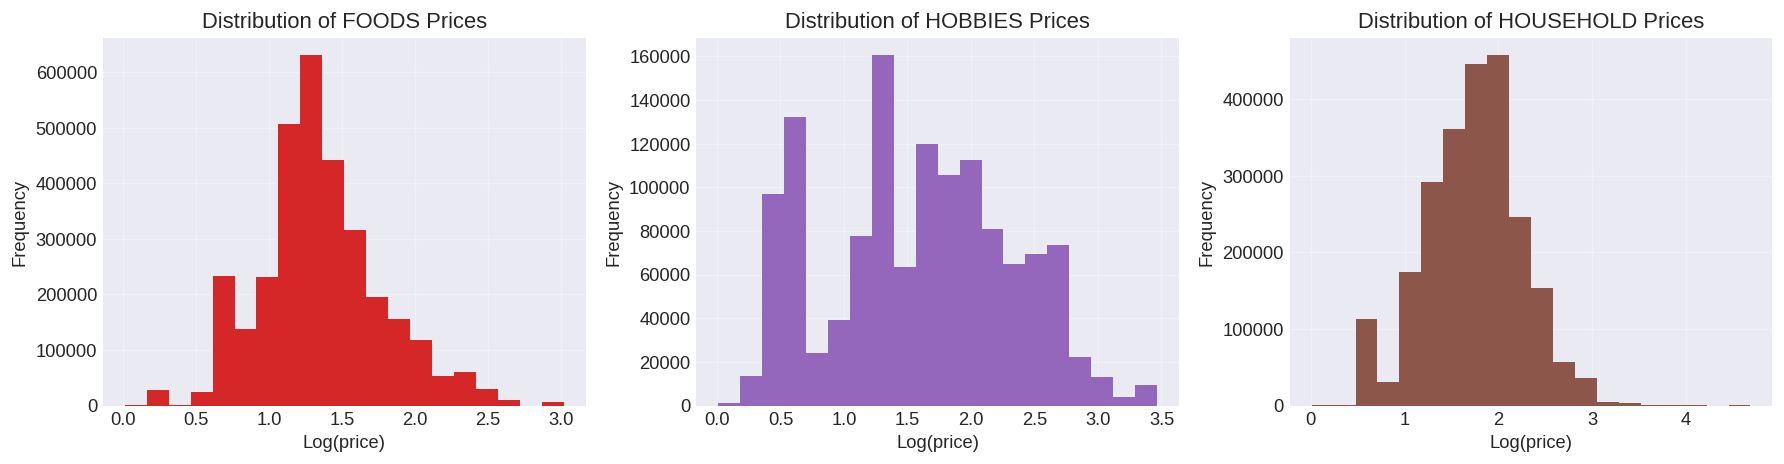

In [80]:
# Create a new column for item category
prices_df['Category'] = prices_df['item_id'].str.split('_', expand=True)[0]

# Plot histograms of log-transformed sale prices for each category
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, (cat, d) in enumerate(prices_df.groupby('Category')):
    ax = d['sell_price'].apply(np.log1p).plot(
        kind='hist',
        bins=20,
        title=f'Distribution of {cat} Prices',
        ax=axs[i],
        color=next(color_cycle)
    )
    ax.set_xlabel('Log(price)')

plt.tight_layout()
plt.show()

## A Simple Submission

For a quick baseline, we can submit the average sales from the past 30 days for each item as our forecast for the next 28 days.


In [83]:
thirty_day_avg_map = sales_df.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()
fcols = [f for f in submission_df.columns if 'F' in f]
for f in fcols:
    submission_df[f] = submission_df['id'].map(thirty_day_avg_map).fillna(0)

submission_df.to_csv('submission.csv', index=False)